In [54]:
import tensorflow
import numpy
import cv2
import matplotlib.pyplot as plt

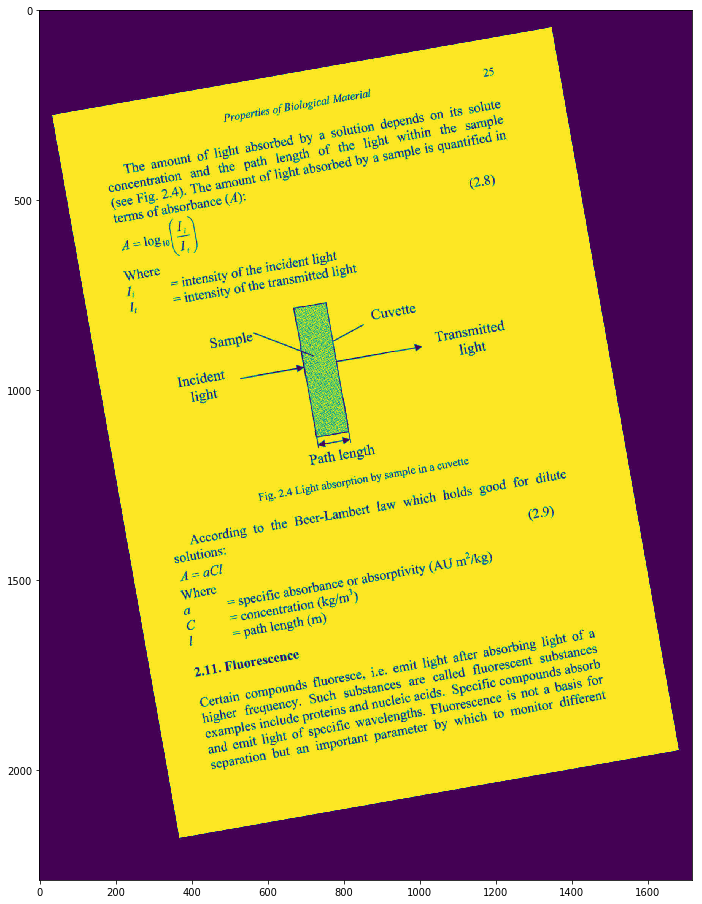

In [55]:
file = 'assets/6.jpg'
image = cv2.imread(file, cv2.CV_8UC1)
plt.figure(figsize=[16,16])
plt.imshow(image)

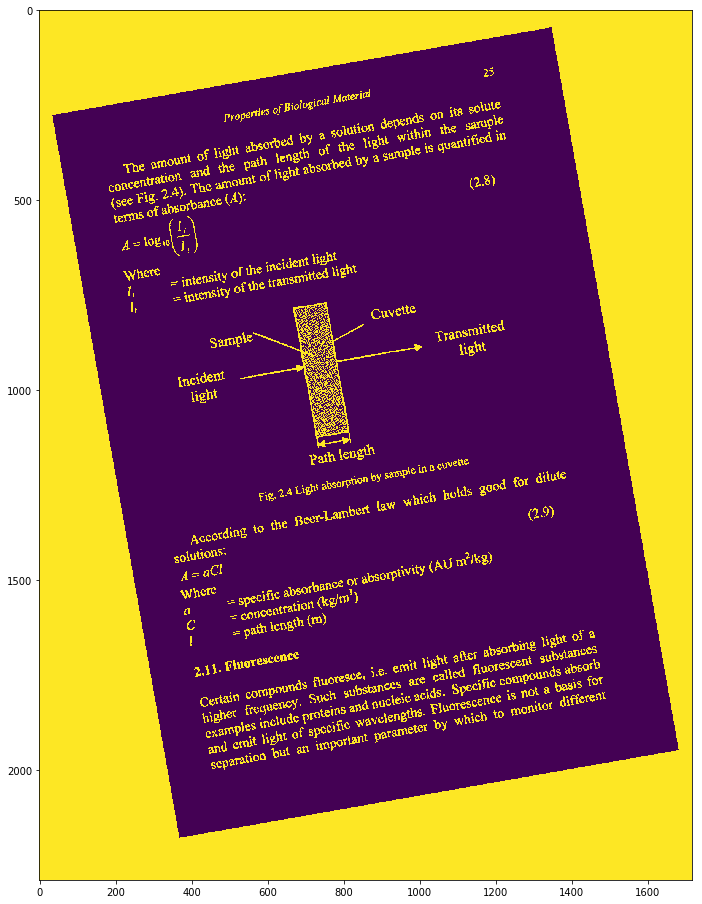

In [56]:
# cv2.threshold(input image, thresh, max, flag)
_, bt = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=[16,16])
plt.imshow(bt)

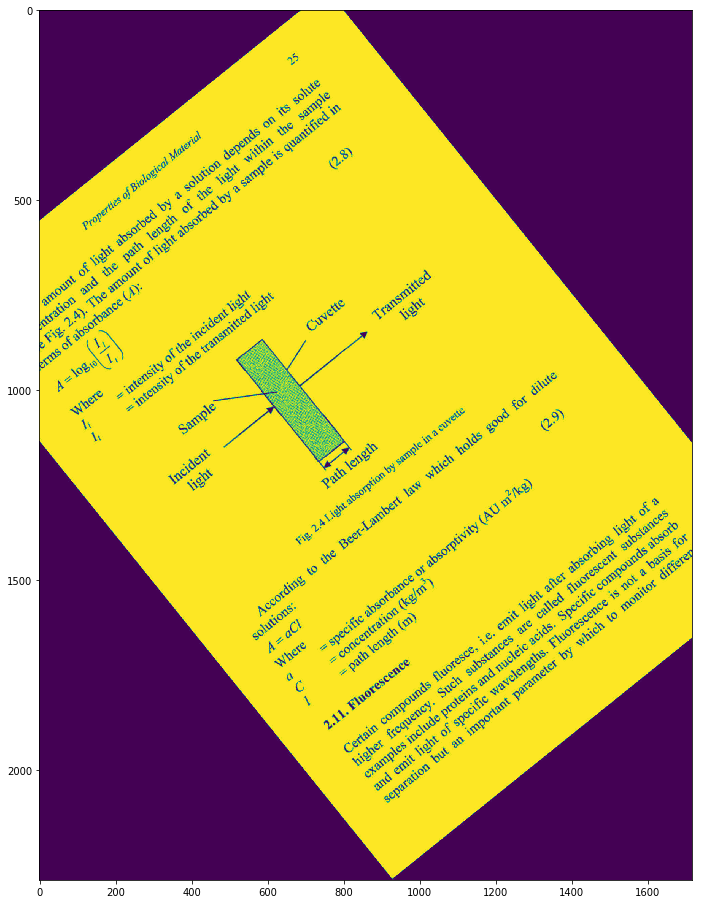

In [57]:
# houghlinesp (binary image, rho resolution, theta resolution, thresh, minlinelength, maxlingap)
lines = cv2.HoughLinesP(bt, 1, numpy.pi/180, 50, minLineLength= 600/2.0, maxLineGap= 20)
angle = 0
for line in lines:
    x1, y1, x2, y2 = line[0]
    r = numpy.arctan2(y2 - y1, x2 - x1)
    angle += numpy.arctan2(y2 - y1, x2 - x1)
avg_radian = angle / len(lines)
avg_angle = avg_radian * 180 / numpy.pi

(h, w) = image.shape
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, avg_angle, 1)
rotated = cv2.warpAffine(image,matrix,(w, h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)

plt.figure(figsize=[16,16])
plt.imshow(rotated)

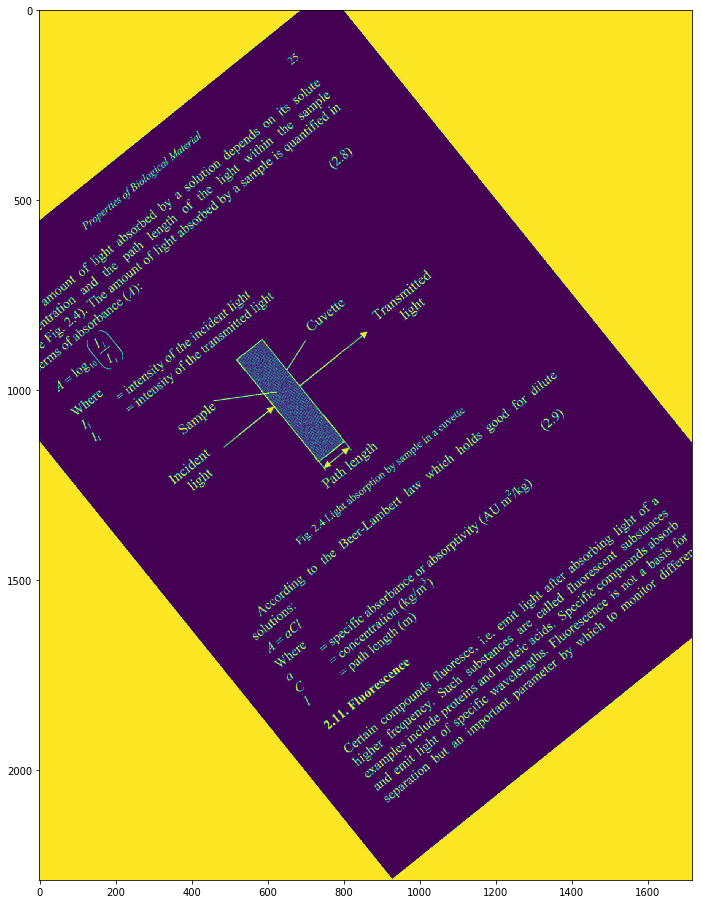

In [58]:
neg = cv2.bitwise_not(rotated)
plt.figure(figsize=(16, 16))
plt.imshow(neg)

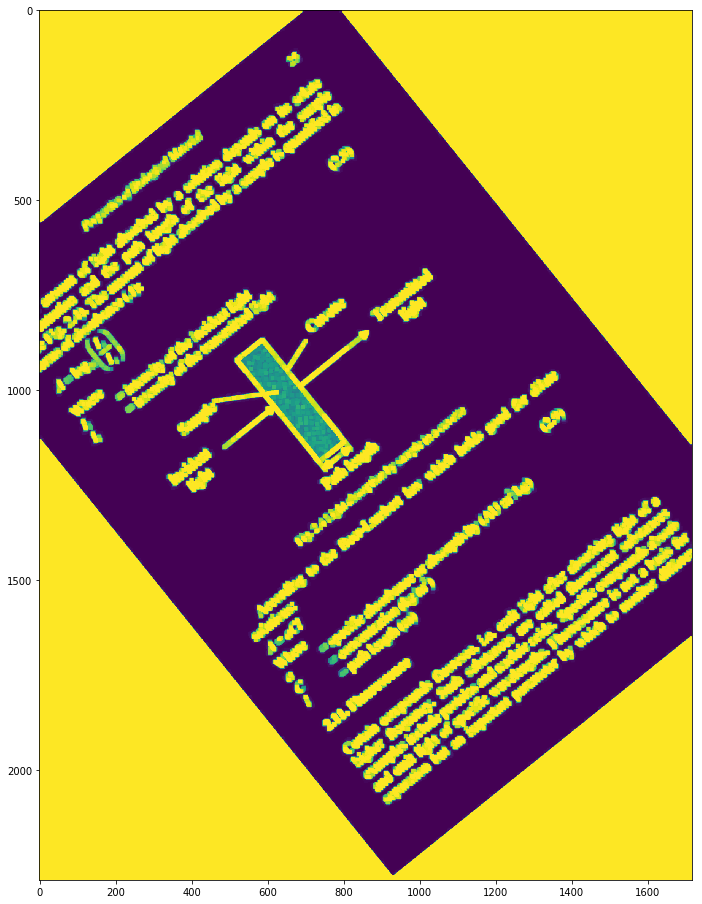

In [59]:
kernel = numpy.ones((10,10))
dilated = cv2.dilate(neg, kernel, iterations=1)
plt.figure(figsize=(16, 16))
plt.imshow(dilated)

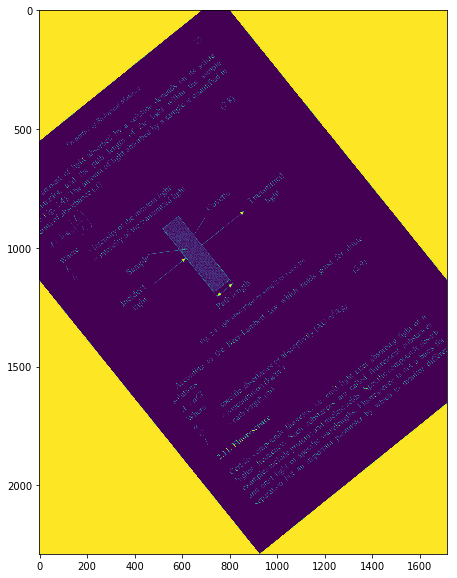

In [60]:
kernel = numpy.ones((3, 3))
eroded = cv2.erode(neg, kernel, iterations=1)
plt.figure(figsize=(10, 10))
plt.imshow(eroded)

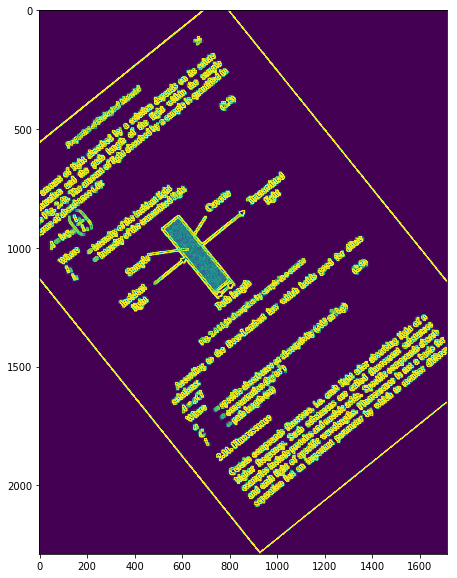

In [61]:
gradient = dilated - eroded
plt.figure(figsize=(10, 10))
plt.imshow(gradient)

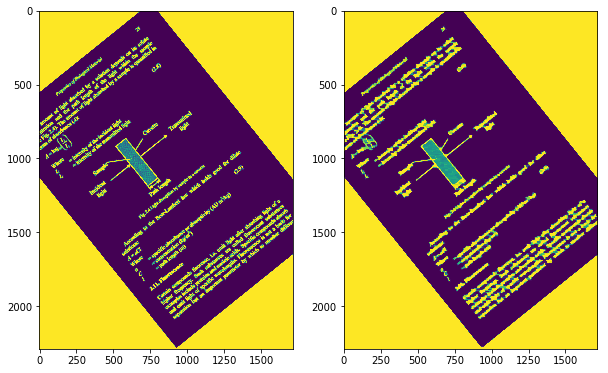

In [62]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.morphologyEx(neg, cv2.MORPH_DILATE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
connected = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel, iterations=2)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(dilate)
fig.add_subplot(1, 2, 2)
plt.imshow(connected)

True

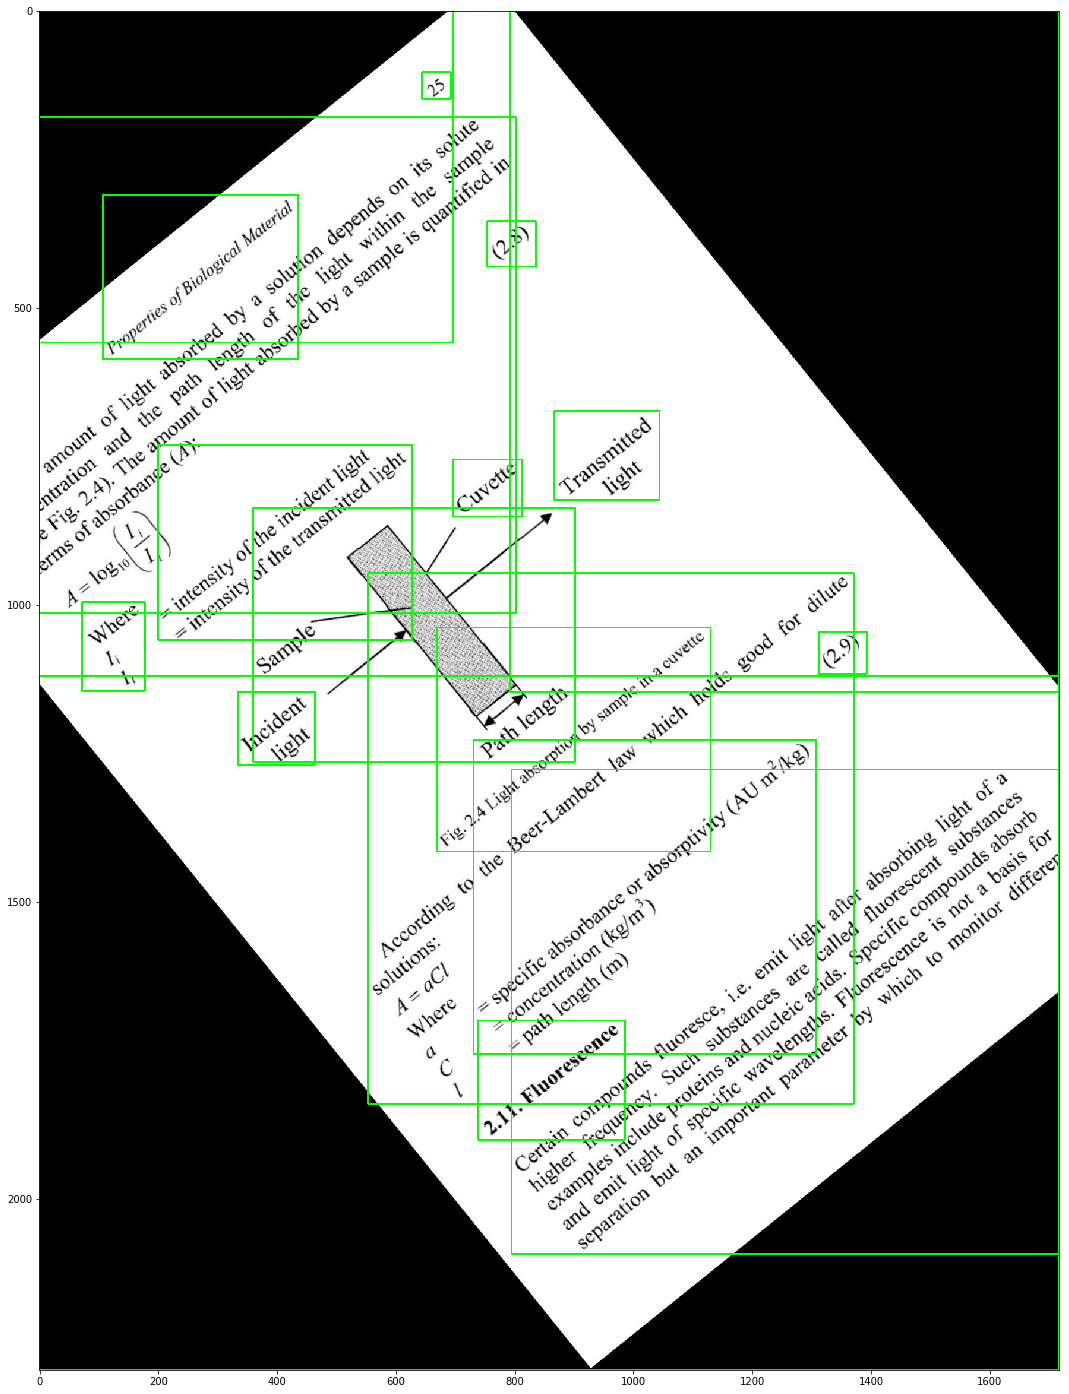

In [63]:
vis = cv2.cvtColor(rotated,cv2.COLOR_GRAY2RGB)
contours, hierarchy = cv2.findContours(connected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boxes = map(lambda c: cv2.boundingRect(c), contours)
filtered = filter(lambda b: b[2] > 20 and b[3] > 25, boxes)

for (x, y, w, h) in filtered:
    cv2.rectangle(vis, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

plt.figure(figsize=(25, 25))
plt.imshow(vis)
cv2.imwrite('jk.png', vis)